In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_insurance = pd.read_csv("/content/drive/MyDrive/ML project/test_Insurance.csv", sep=",")
df_insurance

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H3733,2013,1.0,0,V,V,V,U,3760.0,Fire-resistive,without,43157,oui
1,H16909,2015,1.0,0,V,N,O,R,1452.0,Fire-resistive,5,58194,non
2,H16867,2013,1.0,1,V,N,O,R,1944.0,Ordinary,6,92050,oui
3,H14813,2015,1.0,0,N,V,V,U,2270.0,Non-combustible,without,13209,oui
4,H3728,2016,0.5,0,V,N,O,R,2976.0,Fire-resistive,9,5177,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,H19924,2016,0.5,1,V,N,O,R,862.0,Wood-framed,2,6159,non
2143,H17249,2012,1.0,0,V,V,V,U,NaN,Non-combustible,without,NaN,non
2144,H18804,2014,1.0,0,V,N,O,R,730.0,Non-combustible,3,69027,non
2145,H12650,2014,1.0,1,N,V,V,U,568.0,Non-combustible,without,69091,oui


# Data preprocessing

In [ ]:
df_insurance.dtypes

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted       object
Building_Fenced        object
Garden                 object
Settlement             object
Building Dimension    float64
Building_Type          object
NumberOfWindows        object
Geo_Code               object
Claim                  object
dtype: object

In [ ]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147 entries, 0 to 2146
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         2147 non-null   object 
 1   YearOfObservation   2147 non-null   int64  
 2   Insured_Period      2147 non-null   float64
 3   Residential         2147 non-null   int64  
 4   Building_Painted    2147 non-null   object 
 5   Building_Fenced     2147 non-null   object 
 6   Garden              2144 non-null   object 
 7   Settlement          2147 non-null   object 
 8   Building Dimension  2118 non-null   float64
 9   Building_Type       2147 non-null   object 
 10  NumberOfWindows     2147 non-null   object 
 11  Geo_Code            2118 non-null   object 
 12  Claim               2147 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 218.2+ KB


In [ ]:
df_insurance.describe(include="all")

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
count,2147,2147.000000,2147.000000,2147.000000,2147,2147,2144,2147,2118.000000,2147,2147,2118,2147
unique,2147,NaN,NaN,NaN,2,2,2,2,NaN,4,11,714,2
top,H3733,NaN,NaN,NaN,V,V,V,U,NaN,Non-combustible,without,6088,non
freq,1,NaN,NaN,NaN,1619,1074,1074,1074,NaN,995,1074,41,1639
mean,NaN,2013.691197,0.876805,0.315789,NaN,NaN,NaN,NaN,1899.700189,NaN,NaN,NaN,NaN
std,NaN,1.385631,0.215504,0.464938,NaN,NaN,NaN,NaN,2304.300053,NaN,NaN,NaN,NaN
min,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN
25%,NaN,2012.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,535.500000,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,1100.000000,NaN,NaN,NaN,NaN
75%,NaN,2015.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2300.000000,NaN,NaN,NaN,NaN


In [ ]:
df_insurance.isna().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 3
Settlement             0
Building Dimension    29
Building_Type          0
NumberOfWindows        0
Geo_Code              29
Claim                  0
dtype: int64

In [ ]:
df_insurance.isnull().sum().sum()

61

<Axes: >

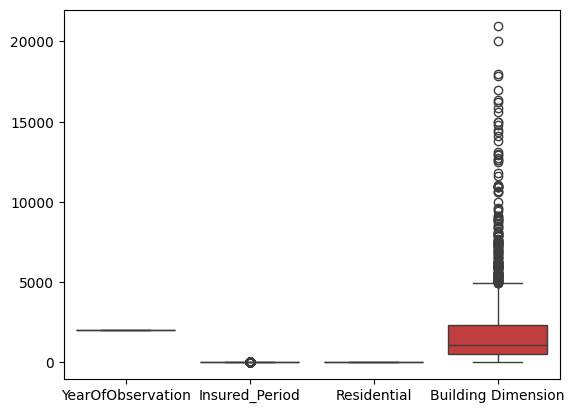

In [ ]:
sns.boxplot(data = df_insurance)

In [ ]:
df_insurance.drop(["Customer Id"], axis=1, inplace=True)

In [ ]:
df_insurance[df_insurance.duplicated()]

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
738,2013,1.0,1,V,V,V,U,NaN,Ordinary,without,NaN,non
1757,2013,1.0,1,V,V,V,U,NaN,Non-combustible,without,NaN,non
1802,2013,0.5,0,V,V,V,U,NaN,Fire-resistive,without,NaN,non
1986,2012,1.0,0,V,V,V,U,NaN,Non-combustible,without,NaN,non
2143,2012,1.0,0,V,V,V,U,NaN,Non-combustible,without,NaN,non


In [ ]:
df_insurance.drop_duplicates(inplace=True)
df_insurance.reset_index(drop=True, inplace = True)

In [ ]:
df_insurance

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,2013,1.0,0,V,V,V,U,3760.0,Fire-resistive,without,43157,oui
1,2015,1.0,0,V,N,O,R,1452.0,Fire-resistive,5,58194,non
2,2013,1.0,1,V,N,O,R,1944.0,Ordinary,6,92050,oui
3,2015,1.0,0,N,V,V,U,2270.0,Non-combustible,without,13209,oui
4,2016,0.5,0,V,N,O,R,2976.0,Fire-resistive,9,5177,non
...,...,...,...,...,...,...,...,...,...,...,...,...
2137,2012,0.5,0,V,N,O,R,400.0,Fire-resistive,4,19272,non
2138,2016,0.5,1,V,N,O,R,862.0,Wood-framed,2,6159,non
2139,2014,1.0,0,V,N,O,R,730.0,Non-combustible,3,69027,non
2140,2014,1.0,1,N,V,V,U,568.0,Non-combustible,without,69091,oui


In [ ]:
l_discret = list(df_insurance.select_dtypes(include="object"))
l_continu = list(set(df_insurance) - set(l_discret))

print(l_discret); print(l_continu)

['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building_Type', 'NumberOfWindows', 'Geo_Code', 'Claim']
['Building Dimension', 'YearOfObservation', 'Insured_Period', 'Residential']


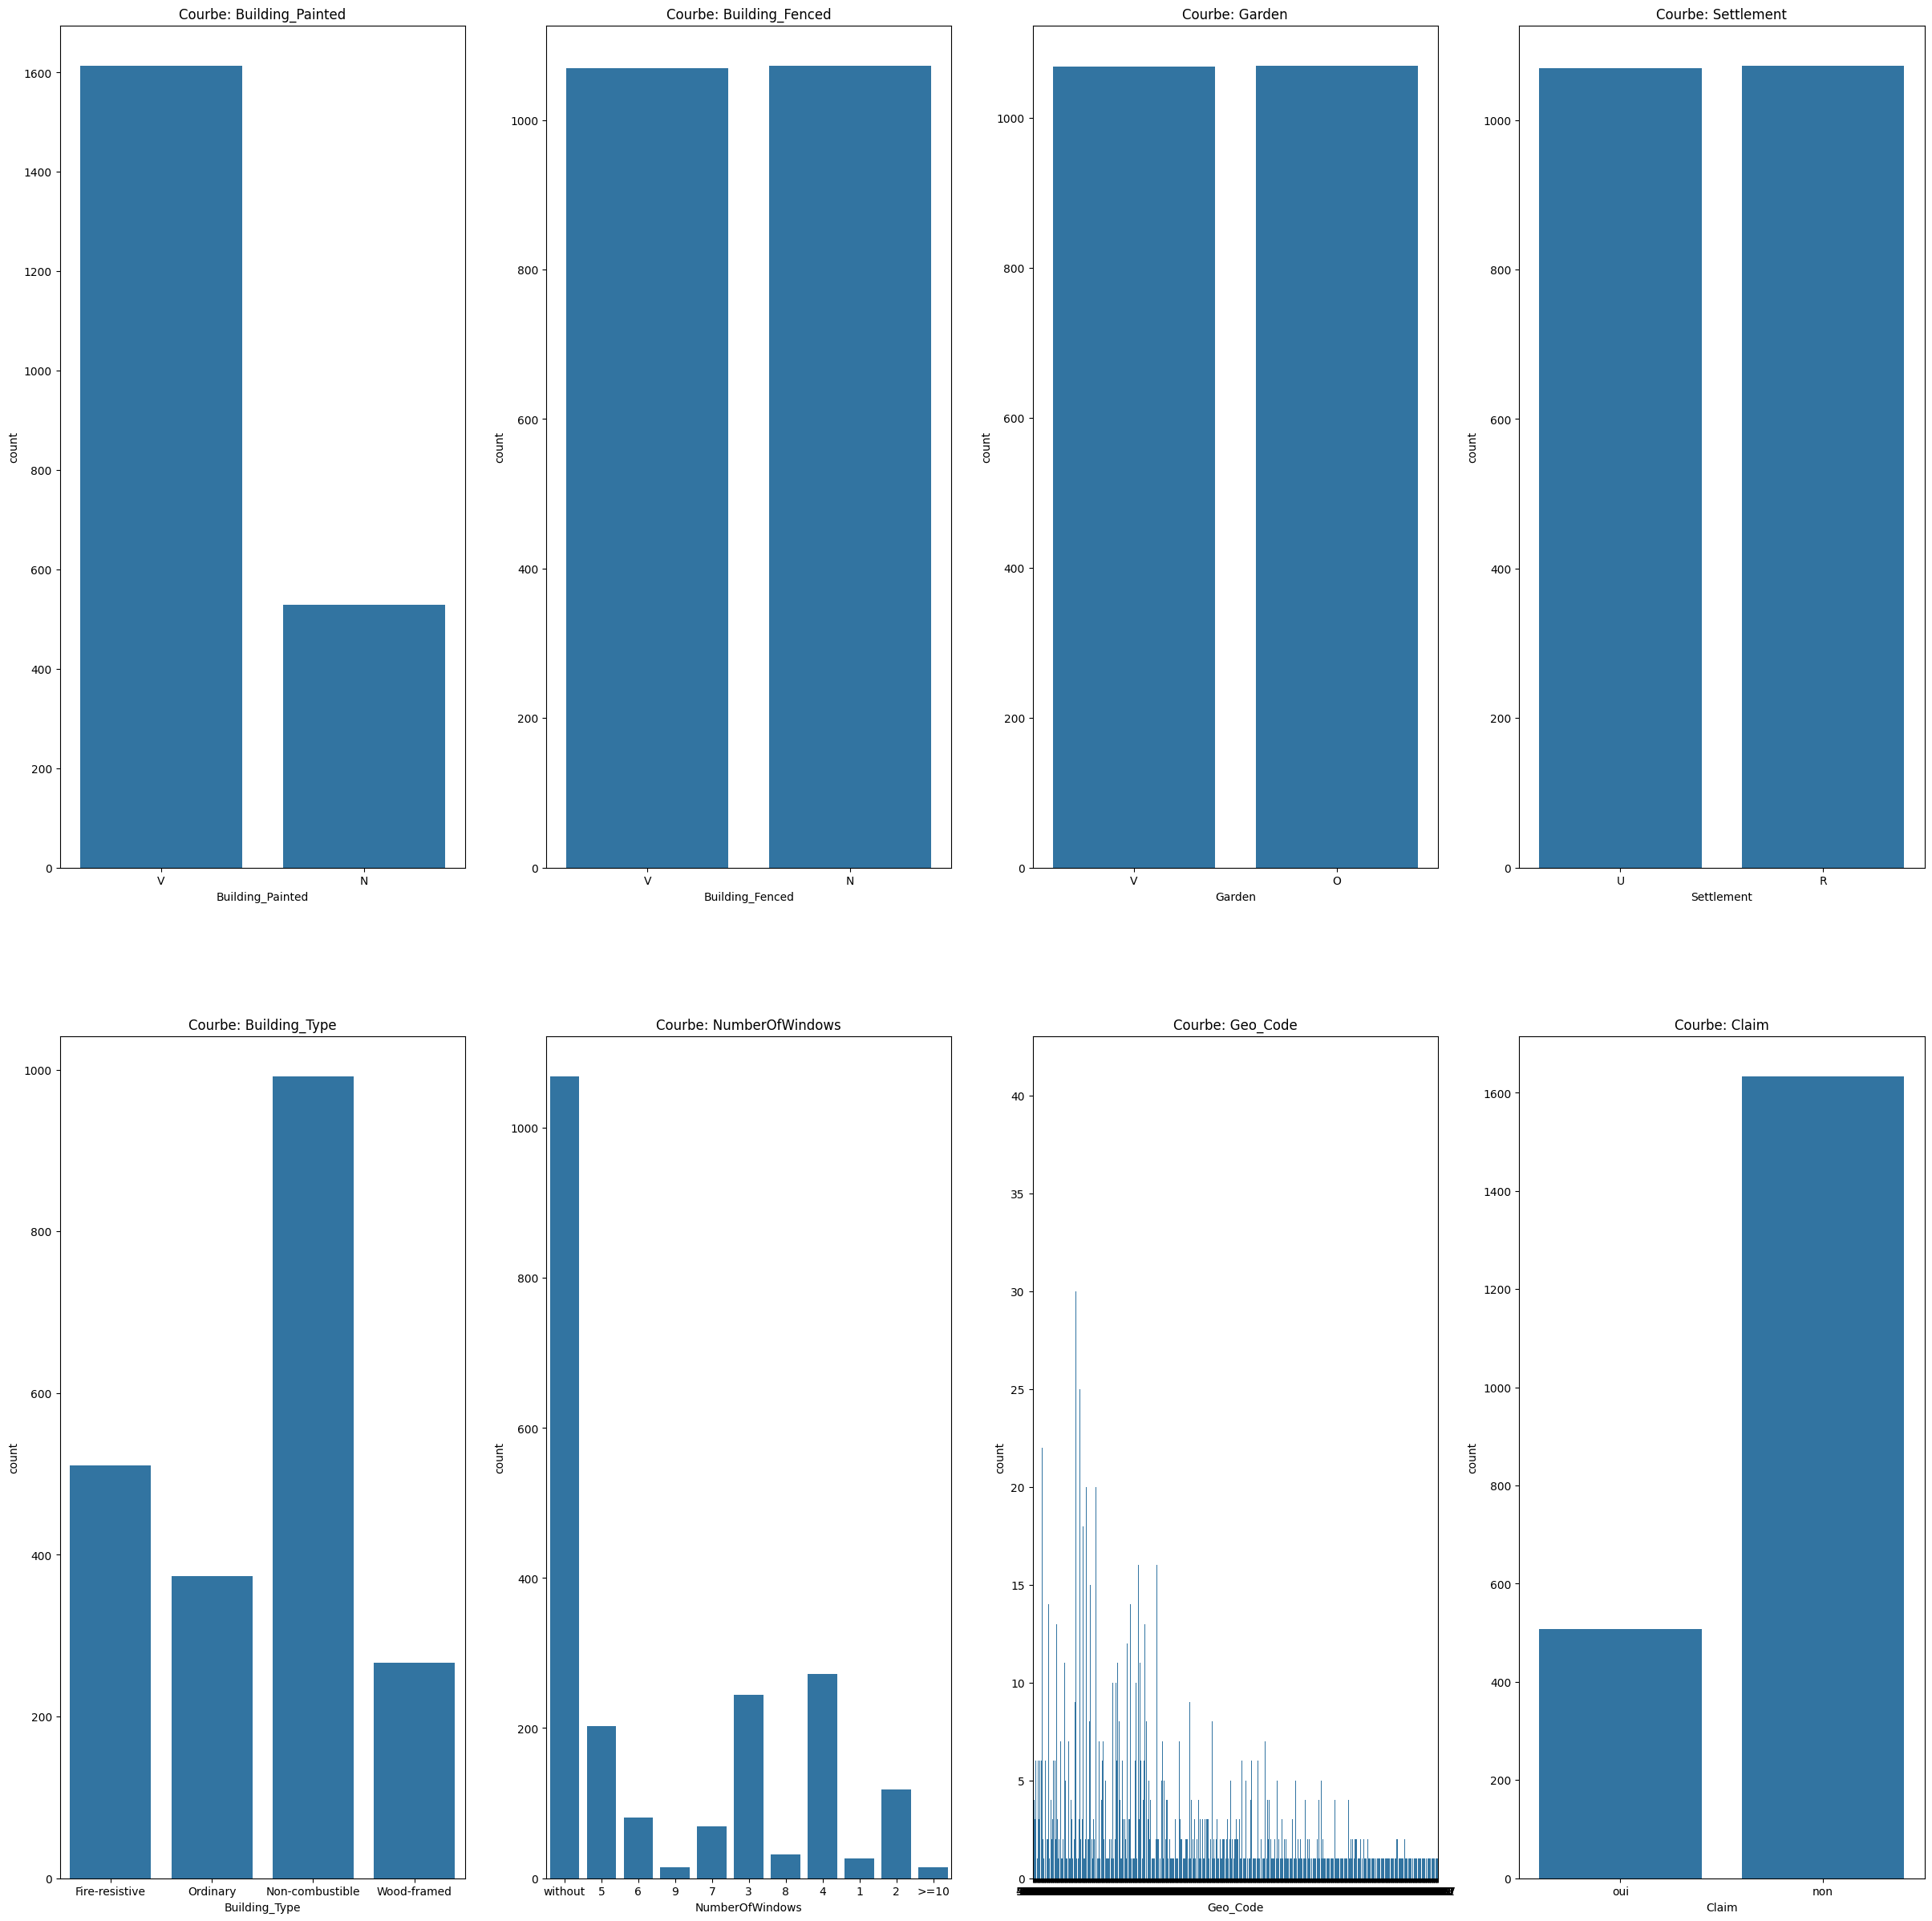

In [ ]:
# Plot categorical variables distribution
plt.figure(figsize=(30, 30))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    sns.countplot(x=l_discret[i], data=df_insurance)
    plt.title("Courbe: " + l_discret[i])

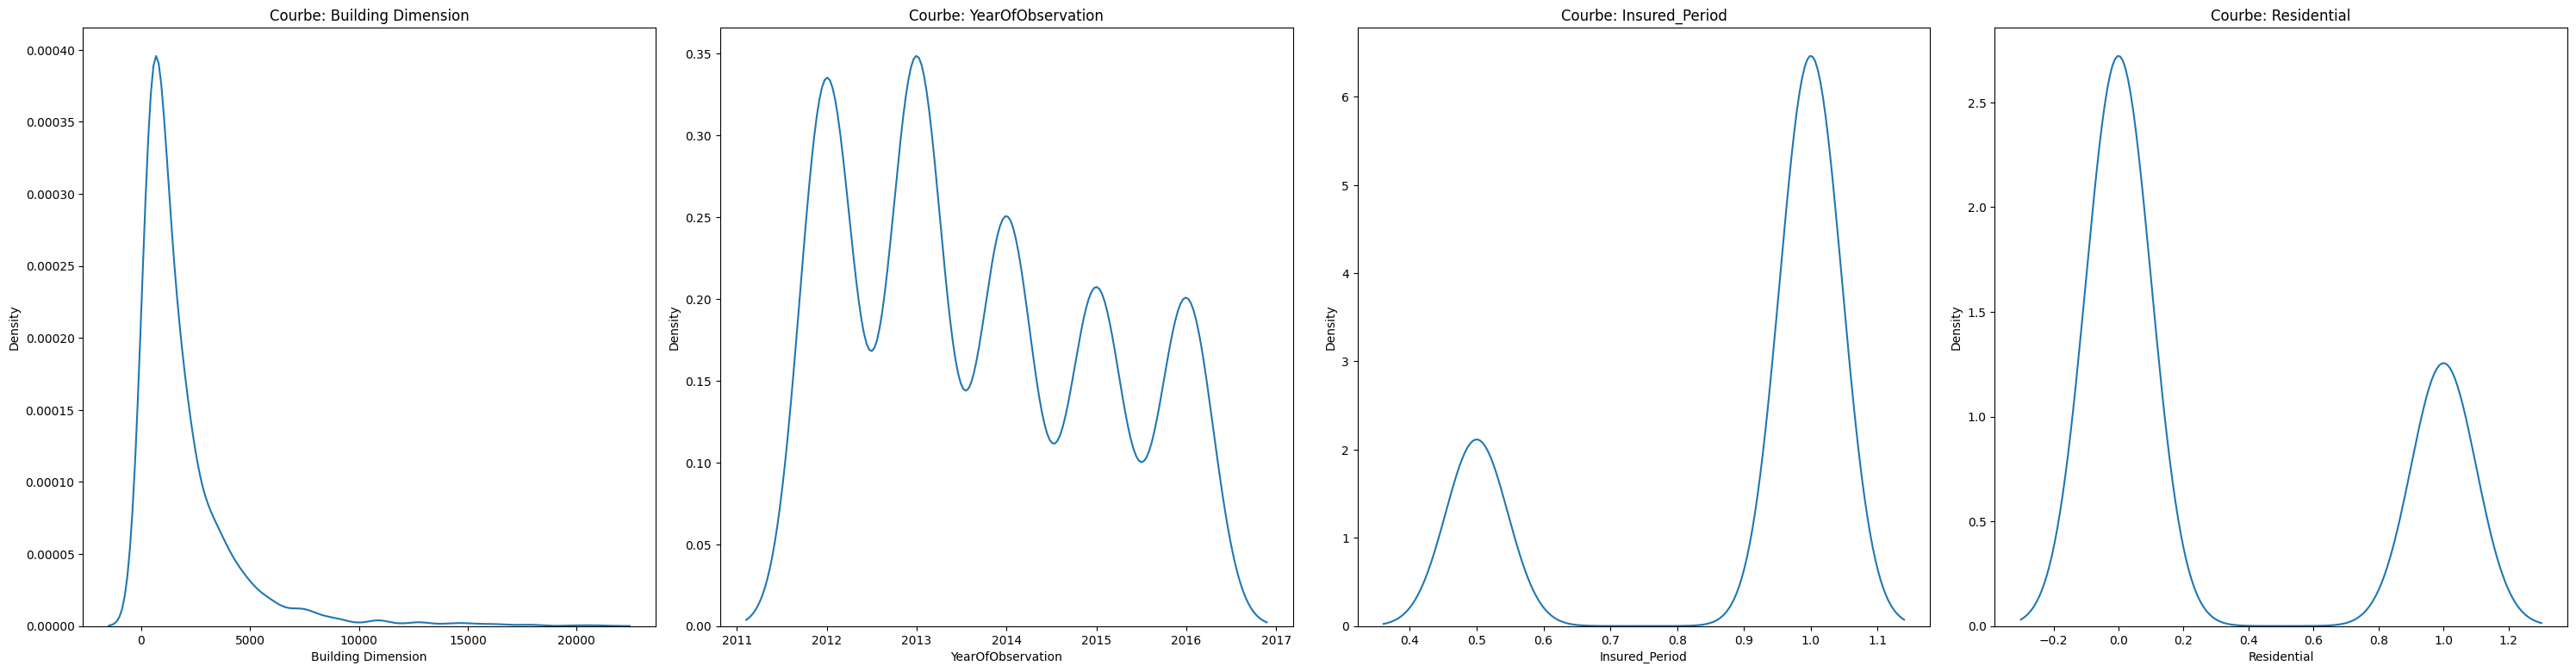

In [ ]:
plt.figure(figsize=(30, 15))
for i, element in enumerate(l_continu):
    plt.subplot(2, 4, i + 1)
    sns.kdeplot(df_insurance[element], bw_method='scott', bw_adjust=1)
    plt.title(f"Courbe: {element}")

plt.tight_layout()
plt.show()

In [ ]:
df_insurance.drop(['YearOfObservation'], axis=1, inplace=True)

In [ ]:
ord_categories= [["non","oui"]]
enc = OrdinalEncoder(categories=ord_categories)

df_insurance[['Claim']] = enc.fit_transform(df_insurance.loc[:, ['Claim']])

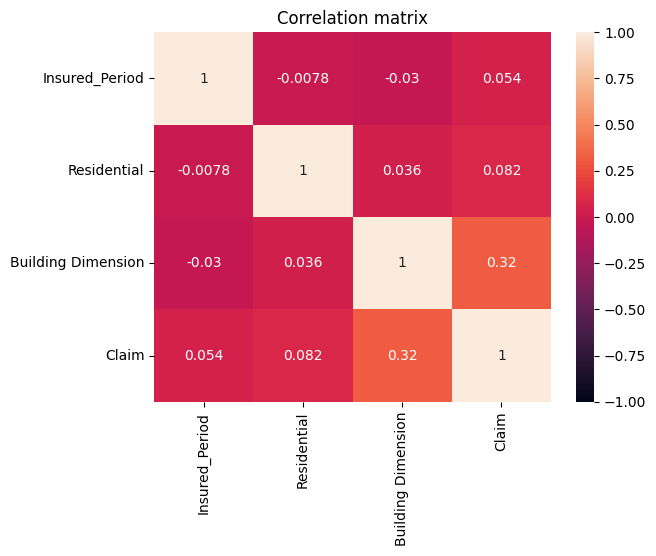

In [ ]:
df_corr = df_insurance.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1)
plt.title('Correlation matrix')
plt.show()

# Data cleaning

1) Missing values

In [ ]:
df_insurance[df_insurance['Garden'].isna()]

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
1091,1.0,0,V,N,NaN,R,3900.0,Fire-resistive,5,61483,0.0
1828,1.0,0,V,N,NaN,R,350.0,Fire-resistive,3,74173,0.0
2094,0.5,1,V,N,NaN,R,8350.0,Ordinary,3,33069,1.0


In [ ]:
df_insurance

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,0,V,V,V,U,3760.0,Fire-resistive,without,43157,1.0
1,1.0,0,V,N,O,R,1452.0,Fire-resistive,5,58194,0.0
2,1.0,1,V,N,O,R,1944.0,Ordinary,6,92050,1.0
3,1.0,0,N,V,V,U,2270.0,Non-combustible,without,13209,1.0
4,0.5,0,V,N,O,R,2976.0,Fire-resistive,9,5177,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2137,0.5,0,V,N,O,R,400.0,Fire-resistive,4,19272,0.0
2138,0.5,1,V,N,O,R,862.0,Wood-framed,2,6159,0.0
2139,1.0,0,V,N,O,R,730.0,Non-combustible,3,69027,0.0
2140,1.0,1,N,V,V,U,568.0,Non-combustible,without,69091,1.0


In [ ]:
from sklearn.impute import SimpleImputer
mf_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_insurance[['Garden']] =mf_imputer.fit_transform(df_insurance.loc[:,['Garden']])

In [ ]:
df_insurance.isna().sum()

Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 0
Settlement             0
Building Dimension    24
Building_Type          0
NumberOfWindows        0
Geo_Code              24
Claim                  0
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_insurance['Building Dimension'] = imputer.fit_transform(df_insurance[['Building Dimension']])
df_insurance.head()

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,0,V,V,V,U,3760.0,Fire-resistive,without,43157,1.0
1,1.0,0,V,N,O,R,1452.0,Fire-resistive,5,58194,0.0
2,1.0,1,V,N,O,R,1944.0,Ordinary,6,92050,1.0
3,1.0,0,N,V,V,U,2270.0,Non-combustible,without,13209,1.0
4,0.5,0,V,N,O,R,2976.0,Fire-resistive,9,5177,0.0


In [ ]:
df_insurance.drop(['Geo_Code'], axis=1, inplace=True)

In [ ]:
df_insurance.isna().sum() # Check

Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
NumberOfWindows       0
Claim                 0
dtype: int64

2) Outliers

In [ ]:
Q1,Q3=np.percentile(df_insurance["Building Dimension"], [25,75])
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
print(upper_limit)

4888.125


In [ ]:
len(df_insurance[df_insurance['Building Dimension'] > upper_limit])

167

In [ ]:
from sklearn.preprocessing import RobustScaler
standard_scaler= RobustScaler()
df_insurance['Building Dimension']= standard_scaler.fit_transform(df_insurance.loc[:,['Building Dimension']])

<Axes: >

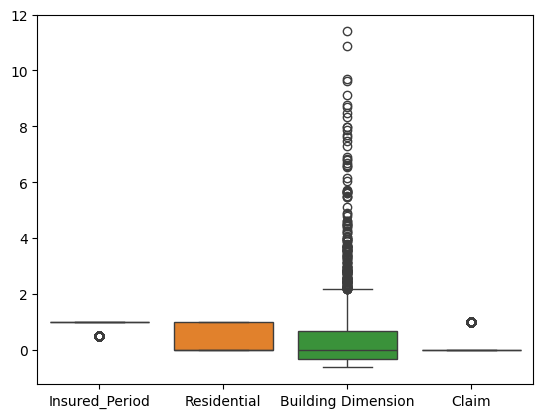

In [ ]:
sns.boxplot(data=df_insurance)

# Data Transformation

In [ ]:
df_insurance['Claim'].value_counts()
# Imbalance data => But never apply SMOTE technique as The test set should be left as is to provide a realistic measure of model performance


'\nClaim\n0.0    1634\n1.0     508\nName: count, dtype: int64\n=> Imbalance data => But never apply SMOTE technique as The test set should be left as is to provide a realistic measure of model performance\n'

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ord_categories= [['V','N'],['V','N'],['O', 'V'],['U', 'R'], ['Fire-resistive', 'Non-combustible','Ordinary', 'Wood-framed']]
enc = OrdinalEncoder(categories=ord_categories)

df_insurance[['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building_Type']] = enc.fit_transform(df_insurance.loc[:, ['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building_Type']])

<Axes: xlabel='NumberOfWindows', ylabel='count'>

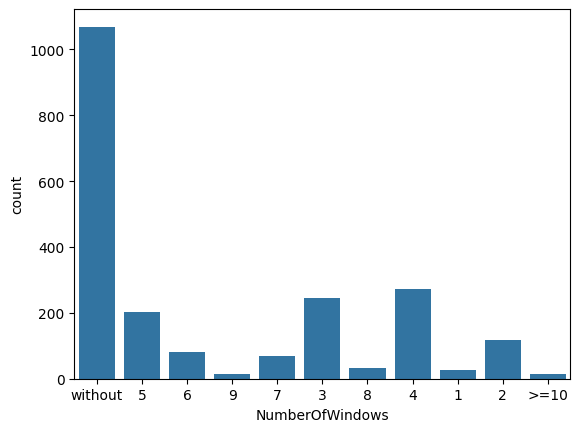

In [ ]:
sns.countplot(x='NumberOfWindows', data=df_insurance)

In [ ]:
df_insurance['NumberOfWindows'] = np.where(df_insurance['NumberOfWindows'] == "without", 0, np.where(df_insurance['NumberOfWindows'] == ">=10", 10,df_insurance['NumberOfWindows']))

<Axes: xlabel='NumberOfWindows', ylabel='count'>

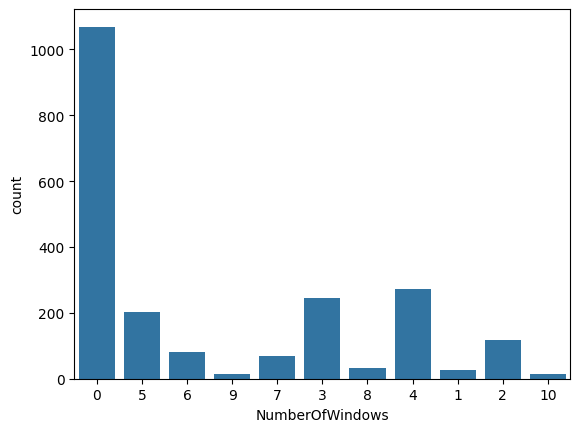

In [ ]:
sns.countplot(x='NumberOfWindows', data=df_insurance)

In [ ]:
df_insurance['NumberOfWindows'] = df_insurance['NumberOfWindows'].astype('int64')

<Axes: xlabel='NumberOfWindows', ylabel='Density'>

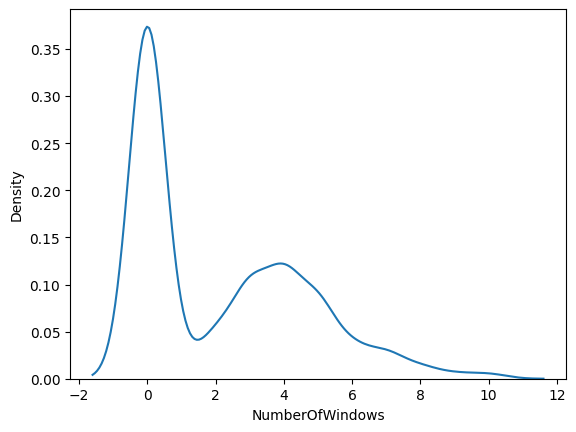

In [ ]:
sns.kdeplot(df_insurance['NumberOfWindows'],bw_method='scott',bw_adjust=1)

In [ ]:
# Alternative verification method
# Right asymmetrical distribution

print(df_insurance['NumberOfWindows'].mean())
print(df_insurance['NumberOfWindows'].median())

from scipy.stats import gaussian_kde
kde = gaussian_kde(df_insurance['NumberOfWindows'])
df_insurance.sort_values(by="NumberOfWindows", inplace=True)
x_vals = df_insurance["NumberOfWindows"].values
y_vals = kde(x_vals)
valeur_mode = x_vals[np.argmax(y_vals)]
print(valeur_mode)
# mode < median < mean : distribution right-skewed => Equal-Frequency Discretization «quantile»

2.141923436041083
1.0
0


# Data discretization

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=4, encode='ordinal',strategy='quantile', subsample=len(df_insurance))
df_insurance['NumberOfWindows'] = enc.fit_transform(df_insurance[['NumberOfWindows']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [ ]:
df_insurance['NumberOfWindows']

0       0.0
1207    0.0
1205    0.0
1203    0.0
1202    0.0
       ... 
355     2.0
1856    2.0
1159    2.0
1130    2.0
587     2.0
Name: NumberOfWindows, Length: 2142, dtype: float64

<Axes: xlabel='NumberOfWindows', ylabel='Density'>

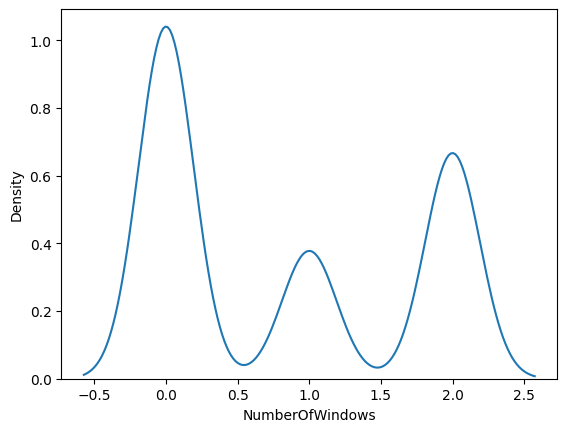

In [ ]:
sns.kdeplot(df_insurance['NumberOfWindows'],bw_method='scott',bw_adjust=1)

In [ ]:
df_insurance

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Claim
0,1.0,0,0.0,0.0,1.0,0.0,1.520770,0.0,0.0,1.0
1207,1.0,0,0.0,0.0,1.0,0.0,1.129797,1.0,0.0,1.0
1205,1.0,0,1.0,0.0,1.0,0.0,-0.051171,3.0,0.0,0.0
1203,0.5,0,1.0,0.0,1.0,0.0,0.152365,1.0,0.0,0.0
1202,1.0,0,0.0,0.0,1.0,0.0,-0.399598,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
355,1.0,1,0.0,1.0,0.0,1.0,2.035935,3.0,2.0,0.0
1856,1.0,1,0.0,1.0,0.0,1.0,1.411528,2.0,2.0,0.0
1159,1.0,0,0.0,1.0,0.0,1.0,1.946241,0.0,2.0,0.0
1130,1.0,1,0.0,1.0,0.0,1.0,5.502947,1.0,2.0,0.0


# Dimensionality Reduction

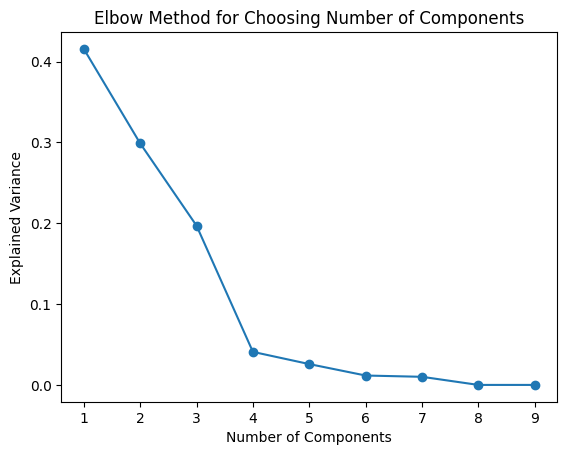

In [ ]:
X = df_insurance.drop('Claim', axis=1)
pca = PCA()

X_pca = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Elbow Method for Choosing Number of Components')
plt.show()

Explained variance ratio for each component: [0.41576514 0.29885825 0.19701867]


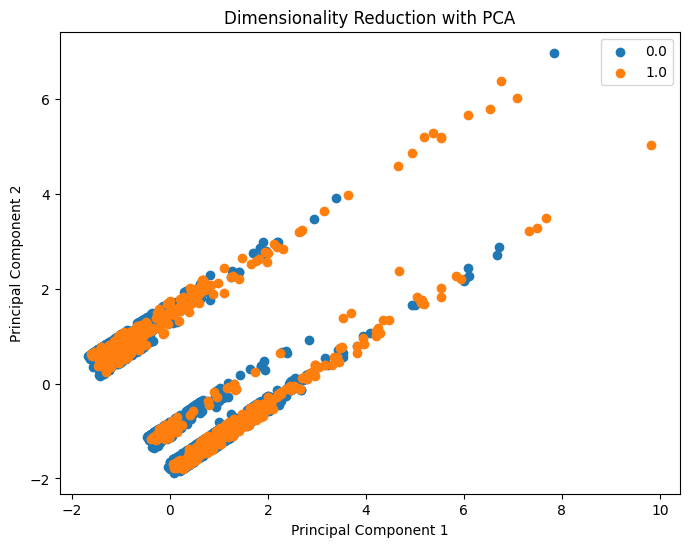

                       Insured_Period  Residential  Building_Painted  \
Principal Component 1       -0.002249     0.028662         -0.115167   
Principal Component 2       -0.006609    -0.028153          0.173177   
Principal Component 3       -0.003640     0.205254          0.062652   

                       Building_Fenced    Garden  Settlement  \
Principal Component 1         0.211080 -0.211080    0.211080   
Principal Component 2        -0.334467  0.334467   -0.334467   
Principal Component 3        -0.045871  0.045871   -0.045871   

                       Building Dimension  Building_Type  NumberOfWindows  
Principal Component 1            0.822939       0.039222         0.416508  
Principal Component 2            0.566636      -0.067785        -0.554884  
Principal Component 3            0.002679       0.973158        -0.024014  


In [ ]:
X = df_insurance.drop('Claim', axis=1)
y = df_insurance['Claim']

pca = PCA(n_components=3)

X_pca = pca.fit_transform(X)

print("Explained variance ratio for each component:", pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
for i, target_name in enumerate(list(df_insurance['Claim'].value_counts().index)):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Dimensionality Reduction with PCA')
plt.legend()
plt.show()

components = pca.components_

components_df = pd.DataFrame(components, columns=list(df_insurance.iloc[:, :-1].columns), index=[f'Principal Component {i+1}' for i in range(pca.n_components_)])

print(components_df)


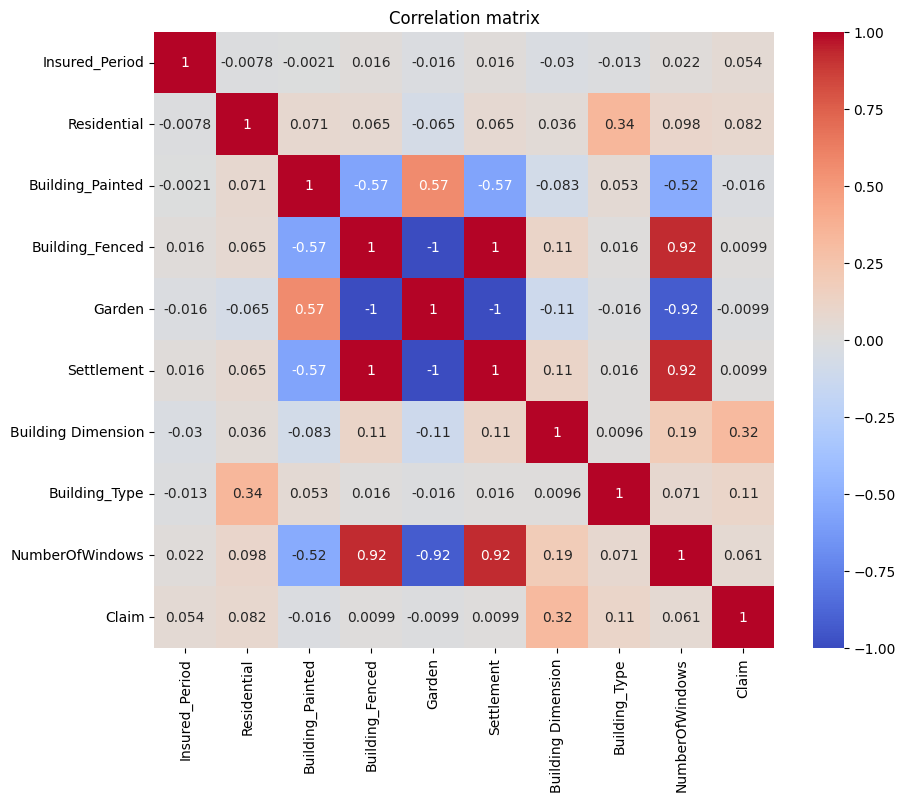

In [ ]:
df_corr = df_insurance.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [ ]:
df_corr['Claim'].sort_values()

Building_Painted     -0.015844
Garden               -0.009935
Building_Fenced       0.009935
Settlement            0.009935
Insured_Period        0.054046
NumberOfWindows       0.060722
Residential           0.081900
Building_Type         0.108034
Building Dimension    0.315319
Claim                 1.000000
Name: Claim, dtype: float64

In [ ]:
#df_insurance = df_insurance.loc[:,['Insured_Period','Building Dimension','Building_Type','NumberOfWindows','Claim']]

In [ ]:
df_insurance.to_csv("/content/drive/MyDrive/ML project/test_Insurance_clean.csv", index=False)